**MNIST Handswritten Digit Classification using Deep Learning (Neural Network)**

Importing Dependencies

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix

Loading the MNIST Data from keras.datasets

In [29]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

In [30]:
type(X_train)

numpy.ndarray

In [31]:
#shape of the numpy arrays
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [32]:
#printing the 10 th image
print(X_train[10])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  42 118 219 166 118 118   6
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 103 242 254 254 254 254 254  66
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  18 232 254 254 254 254 254 238
   70   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 104 244 254 224 254 254 254
  141   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 207 254 210 25

In [33]:
print(X_train[10].shape)

(28, 28)


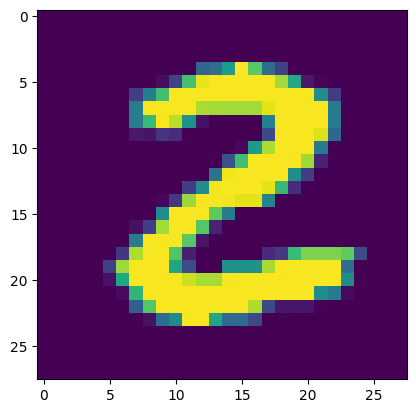

2


In [34]:
#displaying the image

plt.imshow(X_train[25])
plt.show()

#print the corresponding label
print(Y_train[25])

image labels

In [35]:
print(Y_train.shape, Y_test.shape)

(60000,) (10000,)


In [36]:
#Unique values in Y_train
print(np.unique(Y_train))

#unique values in Y_test
print(np.unique(Y_test))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


We can use the labels as such or we can also apply One Hot Encoding

All the images have same dimensions in the dataset , if not, we have to resize all the images to a common dimension

In [37]:
#scaling the values
X_train = X_train/255
X_test = X_test/255

In [38]:
#printing 10th image
print(X_train[10])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

Building the Neural network

In [39]:
#setting up the layers of nueral network
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(50, activation='relu'),
    keras.layers.Dense(50, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [40]:
#compiling the nueral network

model.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy', # Fixed typo here
              metrics=['accuracy'])

In [41]:
#training the nueral network
model.fit(X_train, Y_train, epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.8498 - loss: 0.5174
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9563 - loss: 0.1492
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9677 - loss: 0.1059
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9751 - loss: 0.0824
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9809 - loss: 0.0667
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9839 - loss: 0.0563
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9860 - loss: 0.0481
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9872 - loss: 0.0416
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9885 - loss: 0.0357
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9897 - loss: 0.0313


training data accuracy= 98.9

**Accuracy on test data :**

In [42]:
loss, accuracy= model.evaluate(X_test, Y_test)
print(accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9684 - loss: 0.1192
0.9714999794960022


Test data accuracy= 97.1

In [43]:
print(X_test.shape)

(10000, 28, 28)


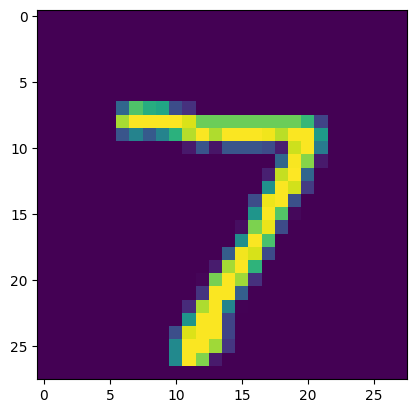

In [44]:
#first data point in X_test
plt.imshow(X_test[0])
plt.show()

In [45]:
print(Y_test[0])

7


In [46]:
Y_pred = model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [47]:
print(Y_pred.shape)

(10000, 10)


In [48]:
print(Y_pred[0])

[1.5418784e-03 9.3885632e-05 3.2546886e-03 9.9857974e-01 2.8654423e-08
 9.3996361e-02 1.3665810e-10 9.9999982e-01 1.0562249e-04 9.7711599e-01]


Moodel.predict() gives the prediction probabilities to clas  label

In [49]:
#converting the prediction probabilities to a class label
labe_for_first_test_image= np.argmax(Y_pred[0])
print(labe_for_first_test_image)

7


In [50]:
#converting the prediction probabilities to a class label for all test points
Y_pred_labels = [np.argmax(i) for i in Y_pred]
print(Y_pred_labels)

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 5, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 9, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 4, 4, 4, 9, 2, 3, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 2, 9, 9, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 3, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 5, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 5, 8, 7, 2, 3, 0, 6, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 0, 8, 5, 7, 7, 9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 8, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1, 9, 6, 5, 2, 5, 9, 3, 9, 3, 0, 4, 2, 0, 7, 1, 1, 2, 1, 

Y_test --> true lables

Y_pred --> predicted labels

Confusion matrix

In [51]:
conf_mat = confusion_matrix(Y_test, Y_pred_labels)
print(conf_mat)

tf.Tensor(
[[ 957    0    1    2    0    3    5    0    2   10]
 [   0 1115    1    7    1    1    2    2    6    0]
 [   1    2  995   11    4    0    3    7    8    1]
 [   0    0    5  996    0    2    0    3    3    1]
 [   0    0    0    0  965    1    7    2    0    7]
 [   1    0    0   27    2  853    2    1    5    1]
 [   4    3    0    1    5    5  939    0    1    0]
 [   0    0    7   13    5    0    1  987    1   14]
 [   2    0    5   17    4   11    1    4  922    8]
 [   1    2    1    8   17    6    2    2    3  967]], shape=(10, 10), dtype=int32)


Text(0.5, 47.7222222222222, 'Predicted Labels')

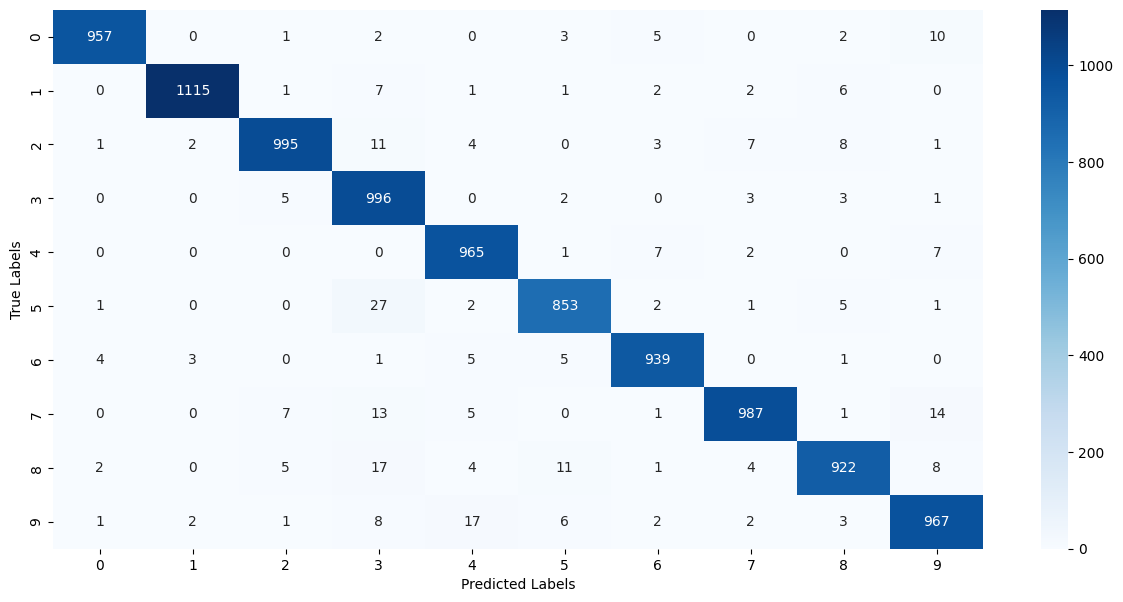

In [52]:
plt.figure(figsize=(15,7))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')

Building Predictive System

prediction image link:

In [53]:
input_image_path = '/content/MNIST_44_0 (2).webp'
input_image = cv2.imread(input_image_path)

In [54]:
type(input_image)

numpy.ndarray

In [56]:
print(input_image)

[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]


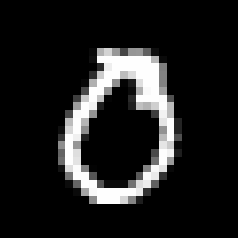

In [58]:
import cv2
from google.colab.patches import cv2_imshow  # Import the Colab-specific function
cv2_imshow(input_image)  # Use cv2_imshow instead of cv2.imshow

In [59]:
input_image.shape

(238, 238, 3)

In [60]:
grayscale = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)

In [61]:
grayscale.shape

(238, 238)

In [62]:
input_image_resize = cv2.resize(grayscale, (28,28))

In [63]:
input_image_resize.shape

(28, 28)

In [71]:
from google.colab.patches import cv2_imshow
import cv2

# Use cv2_imshow instead of cv2.imshow
cv2_imshow(input_image_resize)

In [73]:
input_image_resize = input_image_resize/255

In [74]:
type(input_image_resize)

numpy.ndarray

In [75]:
image_reshaped = np.reshape(input_image_resize, [1,28,28])

In [76]:
input_prediction = model.predict(image_reshaped)
print(input_prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
[[0.18215972 0.34758404 0.26913205 0.20708197 0.5679558  0.8048517
  0.6069838  0.35177848 0.20510043 0.32987794]]


In [77]:
input_pred_labels = np.argmax(input_prediction)

In [78]:
print(input_pred_labels)

5


**Predictive systems**

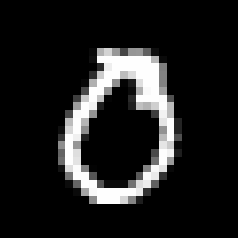

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
The Handwritten Digit is recognised as  [[9.9986094e-01 6.5008759e-02 4.2162821e-01 2.9012528e-03 5.9323724e-05
  3.0213771e-03 1.2549671e-06 7.4531329e-01 8.8627039e-06 9.9152750e-01]]


In [79]:
input_image_path = '/content/MNIST_44_0 (2).webp'

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

grayscale = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)

input_image_resize = cv2.resize(grayscale, (28,28))

input_image_resize = input_image_resize/255

image_reshaped = np.reshape(input_image_resize, [1,28,28])

input_prediction = model.predict(image_reshaped)

input_pred_labels = np.argmax(input_prediction)

print('The Handwritten Digit is recognised as ',input_prediction)